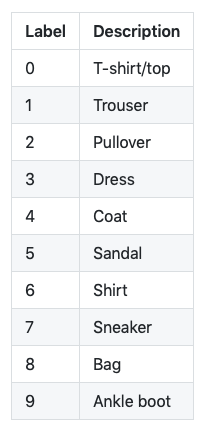

# **FASHION-MNIST DATA**
The ‘Fashion-MNIST’ data set contains 60K gray-scaled images of labeled fashion categories from Zalando articles. It is also used to benchmark machine learning algorithms for image classification.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
type(fashion_mnist.load_data())

tuple

In [4]:
len(fashion_mnist.load_data())

2

In [5]:
for i,j in fashion_mnist.load_data():
  print("i tuple",i.shape)
  print("j tuple",j.shape)

i tuple (60000, 28, 28)
j tuple (60000,)
i tuple (10000, 28, 28)
j tuple (10000,)


In [6]:
for i in fashion_mnist.load_data():
  print(len(i))

2
2


In [7]:
for i,j, in fashion_mnist.load_data():
  print("i tuple",i.shape,"j tuple",j.shape)
  # print("j tuple",j.shape)


i tuple (60000, 28, 28) j tuple (60000,)
i tuple (10000, 28, 28) j tuple (10000,)


In [8]:
len(fashion_mnist.load_data())

2

In [9]:
train_data.shape

(60000, 28, 28)

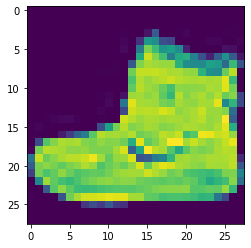

Label:  9


In [10]:
#Let’s display the first image and its label:

plt.imshow(train_data[0])
plt.show()
print("Label: ", train_labels[0])

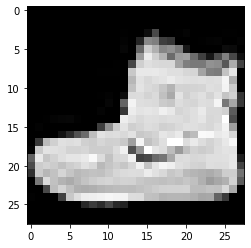

Label:  9


In [11]:
plt.imshow(train_data[0], cmap = 'gray')
plt.show()
print("Label: ", train_labels[0])

In [12]:
# # Chekcing the shape of single example
train_data[0].shape, train_labels[0].shape
# data shape is image(array) of 28X28 & labels with no shape as it is scaler

((28, 28), ())

In [13]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [14]:
train_labels[0]

9

In [15]:
class_names = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

In [16]:
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

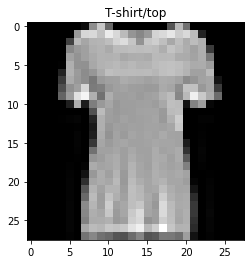

In [17]:
# Plotting example image with its label
label_no = 10
plt.imshow(train_data[label_no], cmap = 'gray')
plt.title(class_names[train_labels[label_no]])

Text(0.5, 1.0, 'T-shirt/top')

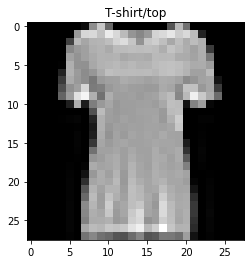

In [18]:
label_no = 10
plt.imshow(train_data[label_no], cmap = 'gray')
plt.title(class_names[train_labels[label_no]])

In [19]:
g1 = tf.random.Generator.from_seed(1)
mynum = g1.uniform(
    (3,), minval=1, maxval=60000, dtype=tf.dtypes.int32)
mynum

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([53761, 55419, 20278], dtype=int32)>

In [20]:
#mynum = tf.random.uniform(
#    (10,), minval=1, maxval=60000, dtype=tf.dtypes.int32)
type(mynum.numpy())

numpy.ndarray

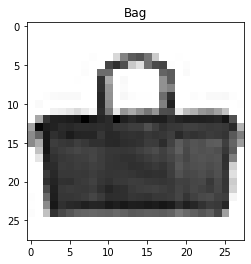

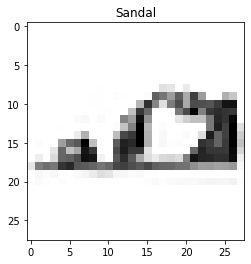

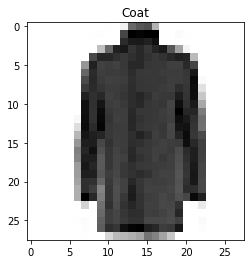

In [21]:

for i in mynum:
  label_no = i
  plt.imshow(train_data[label_no], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[label_no]])
  print()
  plt.show()
  

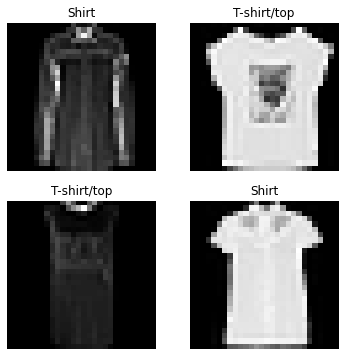

In [22]:
import random
plt.figure(figsize= (6,6))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = 'gray')
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)



Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

- The **input shape** will have to deal with 28x28 tensors (the height and width of our images).
**We're going to flatten the input into a tensor (vector) of shape (784)**.
- The **output shape** will have to be 10 because we need our model to predict for 10 different classes.
- The activation parameter of our output layer will be "softmax"  
- Our loss function should be a multiclass loss function.
Since our labels are in integer form, we'll use **tf.keras.losses.SparseCategoricalCrossentropy()**, if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use **tf.keras.losses.CategoricalCrossentropy()**.
- We'll use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training.

In [23]:
train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [24]:
# Creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    #tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')# output shape is 10, activation is softmax

])

# Compiling the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics= ['accuracy'])

model_history = model.fit(train_data, train_labels, 
                          epochs=10, batch_size = 50,
                          validation_data=(test_data,test_labels))

Epoch 1/10
1200/1200 [==============================] - 5s 2ms/step - loss: 2.3690 - accuracy: 0.0985 - val_loss: 2.3075 - val_accuracy: 0.1000
Epoch 2/10
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0968 - val_loss: 2.3075 - val_accuracy: 0.1000
Epoch 3/10
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3075 - val_accuracy: 0.1000
Epoch 4/10
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3075 - val_accuracy: 0.1000
Epoch 5/10
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0970 - val_loss: 2.3075 - val_accuracy: 0.1000
Epoch 6/10
1200/1200 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0972 - val_loss: 2.3075 - val_accuracy: 0.1000
Epoch 7/10
1200/1200 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3075 - val_accuracy:

In [25]:
model.input.shape, model.output.shape

(TensorShape([None, 28, 28]), TensorShape([None, 10]))

In [26]:
# With one-hot encoder & loss - CategoricalCrossEntropy()

In [27]:
# Creating a model
model_hot_encode = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(4, activation = 'relu'),
    #tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')# output shape is 10, activation is softmax

])

# Compiling the model
model_hot_encode.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics= ['accuracy'])

model_history_hot_encode = model_hot_encode.fit(train_data, tf.one_hot(train_labels,depth = 10), 
                          epochs=10, batch_size = 50,
                          validation_data=(test_data,tf.one_hot(test_labels, depth = 10)))

Epoch 1/10
1200/1200 [==============================] - 3s 3ms/step - loss: 2.3288 - accuracy: 0.1138 - val_loss: 2.3026 - val_accuracy: 0.0999
Epoch 2/10
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0978 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1200/1200 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1200/1200 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1200/1200 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy:

In [28]:
# Looking at the model summary
model_hot_encode.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Scaling or normalising the the data
train_data.min(), train_data.max()

(0, 255)

# Building model after scaling input
- Always Scale/ Normalise the data in neural network. Data should be between 0 & 1

In [30]:
# Scaling our input data

train_data_scaled = train_data/255.0
test_data_scaled = test_data/255.0

In [31]:
train_data_scaled.min(), train_data_scaled.max()

(0.0, 1.0)

In [32]:
# Creating a model
model_scaled = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(4, activation = 'relu'),
    #tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')# output shape is 10, activation is softmax

])

# Compiling the model
model_scaled.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics= ['accuracy'])

model_history_scaled = model_scaled.fit(train_data_scaled, train_labels, 
                          epochs=10, batch_size = 50,
                          validation_data=(test_data_scaled, test_labels))

Epoch 1/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.9978 - accuracy: 0.6414 - val_loss: 0.7256 - val_accuracy: 0.7419
Epoch 2/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.6744 - accuracy: 0.7582 - val_loss: 0.6493 - val_accuracy: 0.7707
Epoch 3/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.6281 - accuracy: 0.7762 - val_loss: 0.6222 - val_accuracy: 0.7801
Epoch 4/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.5997 - accuracy: 0.7885 - val_loss: 0.6271 - val_accuracy: 0.7748
Epoch 5/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.5815 - accuracy: 0.7961 - val_loss: 0.5998 - val_accuracy: 0.7899
Epoch 6/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.5629 - accuracy: 0.8007 - val_loss: 0.5762 - val_accuracy: 0.8024
Epoch 7/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.5474 - accuracy: 0.8075 - val_loss: 0.5787 - val_accuracy:

In [33]:
# Plotting history

In [34]:
import pandas as pd


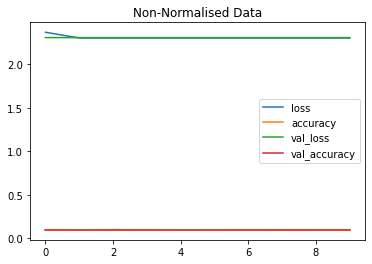

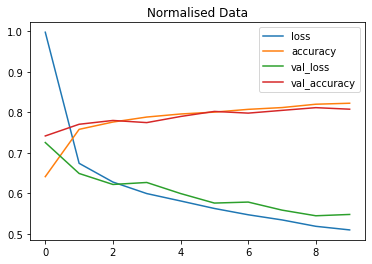

In [35]:
# Plot non-normalised data loss curve
pd.DataFrame(model_history.history).plot(title = 'Non-Normalised Data')

# Plot normalised data loss curve
pd.DataFrame(model_history_scaled.history).plot(title = 'Normalised Data')

# Finding the ideal learning rate

In [36]:
# Creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    #tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')# output shape is 10, activation is softmax

])

# Compiling the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics= ['accuracy'])

# Creating the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

model_history_scaled_lr = model.fit(train_data_scaled, train_labels, 
                          epochs=40, 
                          validation_data=(test_data_scaled,test_labels),
                          callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2300 - accuracy: 0.5835 - val_loss: 0.7354 - val_accuracy: 0.7441 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6479 - accuracy: 0.7782 - val_loss: 0.6309 - val_accuracy: 0.7878 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5976 - accuracy: 0.7984 - val_loss: 0.6201 - val_accuracy: 0.7859 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5747 - accuracy: 0.8053 - val_loss: 0.6019 - val_accuracy: 0.7956 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5628 - accuracy: 0.8070 - val_loss: 0.5868 - val_accuracy: 0.8021 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5564 - accuracy: 0.8081 - val_loss: 0.5850 - val_accuracy: 0.8001 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

In [37]:
pd.DataFrame([range(4)]).apply(lambda epoch: 1e-3 * 10**(epoch/20))

,0,1,2,3
0,0.001,0.001122,0.001259,0.001413


In [38]:
[np.arange(4)]

[array([0, 1, 2, 3])]

In [39]:
pd.DataFrame([range(4)]).apply(lambda epoch: 0.001 * 10**(epoch/20))

,0,1,2,3
0,0.001,0.001122,0.001259,0.001413


In [40]:
10**(-3), 1e-3

(0.001, 0.001)

In [41]:
10**(0.05)

1.1220184543019633

In [42]:
0.001 *10**(0.05)

0.0011220184543019635

Text(0.5, 1.0, 'Finding the Ideal Learning Rate')

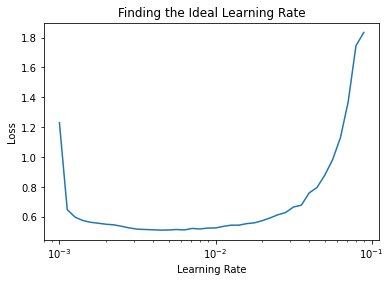

In [43]:
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, model_history_scaled_lr.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the Ideal Learning Rate')

No handles with labels found to put in legend.


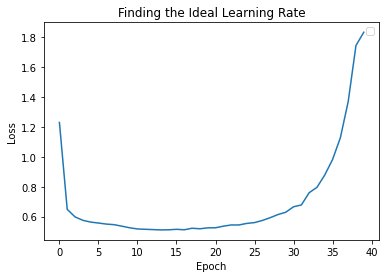

In [44]:
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.plot(range(40), model_history_scaled_lr.history['loss'])
#plt.plot(range(40))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Finding the Ideal Learning Rate')
plt.legend()

# Normalised model with updated learning rate & ephocs

In [45]:
# By looking at the above two plots
# Lets have learning rate of 0.001
# & have epochs = 14



In [46]:
# Creating a model
model_scaled_lr_updated = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    #tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')# output shape is 10, activation is softmax

])

# Compiling the model
model_scaled_lr_updated.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics= ['accuracy'])

# Creating the learning rate callback


model_history_scaled_lr_updated = model_scaled_lr_updated.fit(train_data_scaled, train_labels, 
                          epochs=14, 
                          validation_data=(test_data_scaled,test_labels)
                          )

Epoch 1/14
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1252 - accuracy: 0.6037 - val_loss: 0.7303 - val_accuracy: 0.7333
Epoch 2/14
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6828 - accuracy: 0.7533 - val_loss: 0.6710 - val_accuracy: 0.7573
Epoch 3/14
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6428 - accuracy: 0.7675 - val_loss: 0.6570 - val_accuracy: 0.7652
Epoch 4/14
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6212 - accuracy: 0.7740 - val_loss: 0.6376 - val_accuracy: 0.7695
Epoch 5/14
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6064 - accuracy: 0.7789 - val_loss: 0.6485 - val_accuracy: 0.7655
Epoch 6/14
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5946 - accuracy: 0.7822 - val_loss: 0.6181 - val_accuracy: 0.7750
Epoch 7/14
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5833 - accuracy: 0.7861 - val_loss: 0.6159 - val_accuracy:

# Evaluating Our Multiclass Classification Model

Text(0.5, 1.0, 'Finding the Ideal Learning Rate')

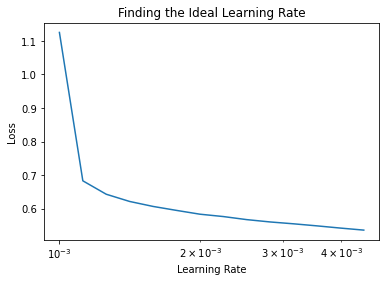

In [47]:
lrs = 1e-3 * (10**(tf.range(14)/20))
plt.semilogx(lrs, model_history_scaled_lr_updated.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the Ideal Learning Rate')

No handles with labels found to put in legend.


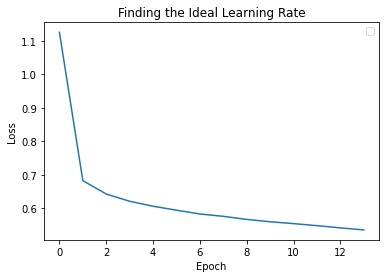

In [48]:
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.plot(range(14), model_history_scaled_lr_updated.history['loss'])
#plt.plot(range(40))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Finding the Ideal Learning Rate')
plt.legend()

In [49]:
# Looking at the Confusion Matrix

In [50]:
# Creating Confusion Matrix
from sklearn.metrics import confusion_matrix

In [51]:
# Making Predicitons
y_preds = model_scaled_lr_updated.predict(test_data_scaled)

In [52]:
type(y_preds)

numpy.ndarray

In [53]:
# Convert all of the predictions probabilities into integers
y_preds = y_preds.argmax(axis = 1)

In [54]:
# Viewing the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [55]:
test_labels.shape, y_preds.shape

((10000,), (10000,))

In [56]:
# Creating Confusion Matrix
cm = confusion_matrix(test_labels, y_preds)
cm

array([[718,  22,  12, 103,   4,   1, 126,   0,  14,   0],
       [  1, 958,  11,  25,   3,   0,   2,   0,   0,   0],
       [ 21,   5, 698,   7, 160,   0, 107,   0,   2,   0],
       [ 42,  20,  12, 797,  14,   3, 103,   0,   8,   1],
       [  1,   8, 146,  11, 696,   1, 128,   0,   9,   0],
       [  0,   0,   1,   4,   0, 914,   0,  46,  11,  24],
       [143,   5, 119,  56, 157,   0, 503,   0,  17,   0],
       [  0,   0,   0,   0,   0,  31,   0, 932,   0,  37],
       [  0,   0,   6,  12,  10,  12,  59,   3, 896,   2],
       [  0,   0,   1,   1,   0,  10,   0,  45,   9, 934]])

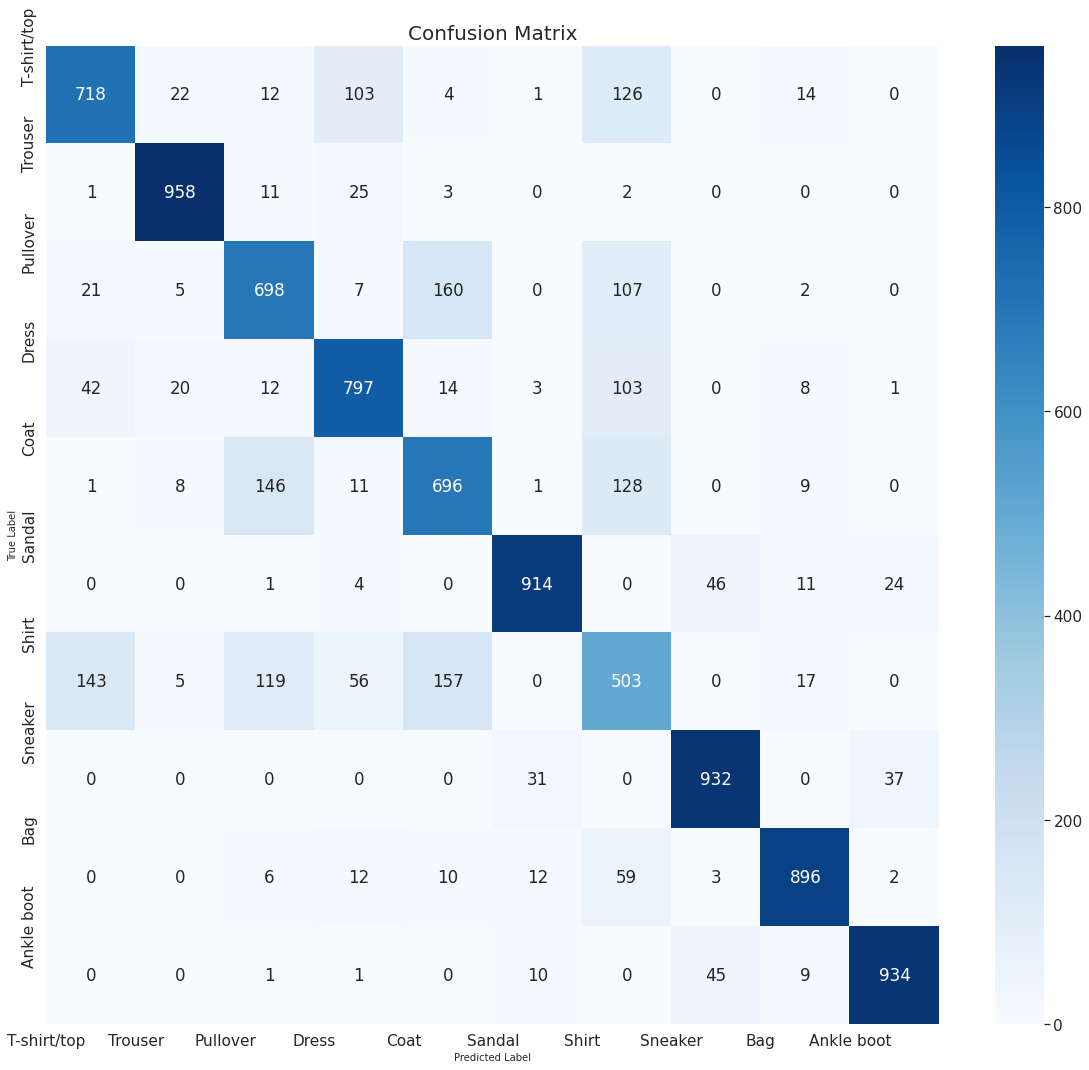

In [57]:
import seaborn as sns
sns.set(font_scale=1.4)
plt.figure(figsize = (20,18))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
n_classes = cm.shape[0]
if class_names:
  labels = class_names
else:
  labels = np.arange(cm.shape[0])
ax.set(
    title = 'Confusion Matrix',
    xlabel = 'Predicted Label',
    ylabel = 'True Label',
    xticks = np.arange(n_classes),
    yticks = np.arange(n_classes),
    xticklabels = labels,
    yticklabels = labels

)

ax.yaxis.label.set_size(10)
ax.xaxis.label.set_size(10)
ax.title.set_size(20)

In [58]:
 cm.shape[0], np.arange(4)

(10, array([0, 1, 2, 3]))

In [59]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [79]:
mynum = 0

In [80]:
if mynum:
  
  print(1)
  
  print(2)
else:
  
  print(3)

3


In [83]:
test_labels.shape, y_preds.shape

((10000,), (10000,))

In [85]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [86]:
y_preds

array([9, 2, 1, ..., 8, 1, 5])

In [88]:
# Evaluating Our Model
model_scaled_lr_updated.evaluate(test_data_scaled, y_preds)

313/313 [==============================] - 1s 4ms/step - loss: 0.2828 - accuracy: 1.0000


[0.2828497886657715, 1.0]

# Visualising data & Images
- Plot a random image
- Make a prediciton on the image
- Label the image with true label & predicted label

In [89]:
model_scaled_lr_updated.evaluate(test_data, y_preds)

313/313 [==============================] - 1s 4ms/step - loss: 50.4739 - accuracy: 0.8010


[50.47389221191406, 0.8009999990463257]

In [94]:
test_data.shape, y_preds.shape

((10000, 28, 28), (10000,))

In [96]:
len(test_data)

10000

In [100]:
test_data[777].shape

(28, 28)

In [104]:
class_names[model_scaled_lr_updated.predict(test_data[777].reshape(1,28,28)).argmax()]

'Trouser'

In [106]:
class_names[test_labels[777]]

'Trouser'

In [203]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

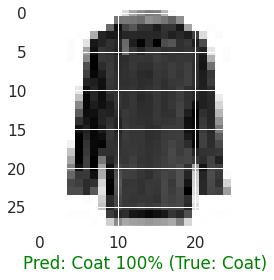

In [204]:
# Check out a random image as well as its prediction
plot_random_image(model=model_scaled_lr_updated, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

In [115]:
import cv2

In [169]:
img = cv2.imread('/content/tshirt_28.jpg',0)

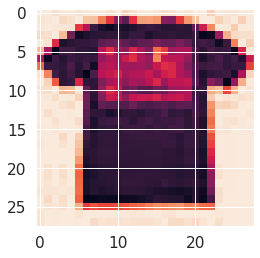

In [170]:
plt.imshow(img)

In [160]:
img.shape

(28, 28)

In [162]:
myimg = img.reshape(1,28,28)

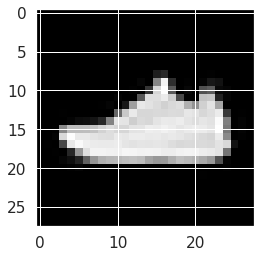

In [205]:
  target_image = img
  pred_probs = model_scaled_lr_updated.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = class_names[pred_probs.argmax()]
  true_label = class_names[0]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

In [206]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image_myimg(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 

  
  # Create predictions and targets
  target_image = images
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

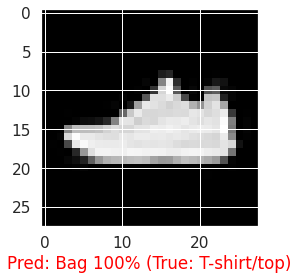

In [207]:
plot_random_image_myimg(model=model_scaled_lr_updated, 
                  images=img, 
                  true_labels=0, 
                  classes=class_names)

In [220]:
img = cv2.imread('/content/pants_28.jpg',cv2.IMREAD_GRAYSCALE)

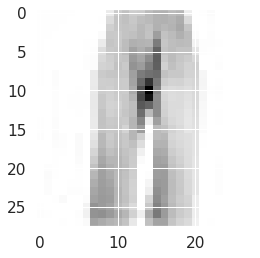

In [222]:
plt.imshow(img, cmap = 'gray')

In [210]:
img.shape

(28, 28)

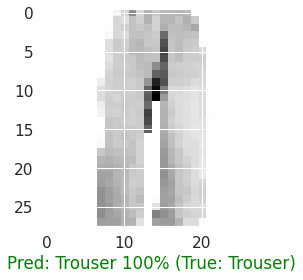

In [238]:
img = cv2.imread('/content/pants01.jpg',cv2.IMREAD_GRAYSCALE)
resize_img = cv2.resize(img,(28,28),interpolation = cv2.INTER_LINEAR)
myimg = cv2.bitwise_not(resize_img)
plot_random_image_myimg(model=model_scaled_lr_updated, 
                  images=myimg, 
                  true_labels=1, 
                  classes=class_names)

In [230]:

img = cv2.imread('/content/tshirt_28.jpg',cv2.IMREAD_GRAYSCALE)


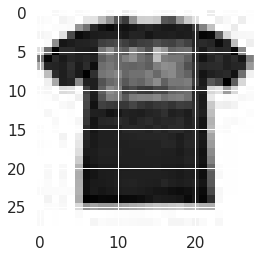

In [231]:
plt.imshow(img, cmap = 'gray')

In [227]:
img.shape

(28, 28)

In [228]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

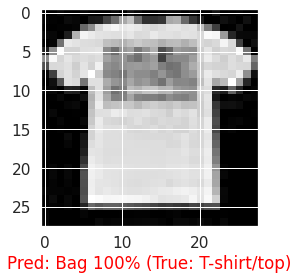

In [232]:
plot_random_image_myimg(model=model_scaled_lr_updated, 
                  images=img, 
                  true_labels=0, 
                  classes=class_names)

In [217]:
bw_img.shape

(28, 28)

In [260]:

def my_fashion_img_pred(path, image, img_label):
  img = cv2.imread(path+'/'+image,cv2.IMREAD_GRAYSCALE)
  resize_img = cv2.resize(img,(28,28),interpolation = cv2.INTER_LINEAR)
  myimg = cv2.bitwise_not(resize_img)
  plot_random_image_myimg(model=model_scaled_lr_updated, 
                  images=myimg, 
                  true_labels=img_label, 
                  classes=class_names)




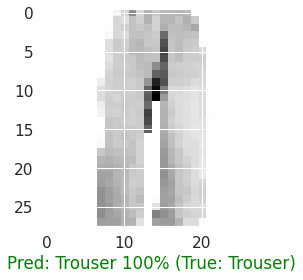

In [261]:
my_fashion_img_pred('/content','pants01.jpg',1)

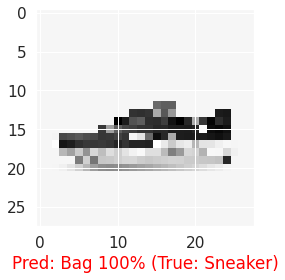

In [262]:
my_fashion_img_pred('/content','shoes1.jpg',7)

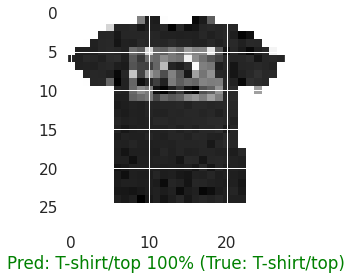

In [263]:
my_fashion_img_pred('/content','tshirt.jpg',0)